Volleyball Canada

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/scraping-volleyball-teams/__results__.html
/kaggle/input/scraping-volleyball-teams/__notebook__.ipynb
/kaggle/input/scraping-volleyball-teams/scraped_team_info.csv
/kaggle/input/scraping-volleyball-teams/__output__.json
/kaggle/input/scraping-volleyball-teams/custom.css
/kaggle/input/scraping-bvb-player-info/__results__.html
/kaggle/input/scraping-bvb-player-info/__notebook__.ipynb
/kaggle/input/scraping-bvb-player-info/__output__.json
/kaggle/input/scraping-bvb-player-info/scraped_player_data.csv
/kaggle/input/scraping-bvb-player-info/custom.css


In [2]:
# data sources can be from any directory
scraped_player_info = "/kaggle/input/scraping-bvb-player-info/scraped_player_data.csv"
scraped_team_info = "/kaggle/input/scraping-volleyball-teams/scraped_team_info.csv"

In [3]:
# Loading data
teams_df = pd.read_csv(scraped_team_info)
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Finish           574 non-null    float64
 1   Player           611 non-null    object 
 2   Partner          611 non-null    object 
 3   Player_ID        611 non-null    int64  
 4   Partner_ID       611 non-null    int64  
 5   Country          611 non-null    object 
 6   TourniStartDate  611 non-null    object 
 7   TourniEndDate    611 non-null    object 
 8   TournLocation    611 non-null    object 
 9   Event            611 non-null    object 
 10  TOURNID          611 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 52.6+ KB


In [4]:
# remove unnamed first column
if 'Unnamed: 0' in teams_df.columns:
    # Drop the column
    teams_df.drop('Unnamed: 0', axis=1, inplace=True)
teams_df.head()

,Finish,Player,Partner,Player_ID,Partner_ID,Country,TourniStartDate,TourniEndDate,TournLocation,Event,TOURNID
0,1.0,Anders Mol,Christian Sorum,14741,13274,Norway,2023-02-01,2023-02-05,Doha,BPTElite16 Men,4146
1,2.0,David Ahman,Jonatan Hellvig,17928,18278,Sweden,2023-02-01,2023-02-05,Doha,BPTElite16 Men,4146
2,3.0,Adrian Carambula,Alex Ranghieri,8338,11262,Italy,2023-02-01,2023-02-05,Doha,BPTElite16 Men,4146
3,4.0,Michal Bryl,Bartosz Losiak,13340,10444,Poland,2023-02-01,2023-02-05,Doha,BPTElite16 Men,4146
4,5.0,Alexander Brouwer,Robert Meeuwsen,9129,9130,Netherlands,2023-02-01,2023-02-05,Doha,BPTElite16 Men,4146


In [5]:
# Formatting the columns
teams_df.columns = [col.upper().replace(' ', '_') for col in teams_df.columns]
teams_df.head()

,FINISH,PLAYER,PARTNER,PLAYER_ID,PARTNER_ID,COUNTRY,TOURNISTARTDATE,TOURNIENDDATE,TOURNLOCATION,EVENT,TOURNID
0,1.0,Anders Mol,Christian Sorum,14741,13274,Norway,2023-02-01,2023-02-05,Doha,BPTElite16 Men,4146
1,2.0,David Ahman,Jonatan Hellvig,17928,18278,Sweden,2023-02-01,2023-02-05,Doha,BPTElite16 Men,4146
2,3.0,Adrian Carambula,Alex Ranghieri,8338,11262,Italy,2023-02-01,2023-02-05,Doha,BPTElite16 Men,4146
3,4.0,Michal Bryl,Bartosz Losiak,13340,10444,Poland,2023-02-01,2023-02-05,Doha,BPTElite16 Men,4146
4,5.0,Alexander Brouwer,Robert Meeuwsen,9129,9130,Netherlands,2023-02-01,2023-02-05,Doha,BPTElite16 Men,4146


In [6]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FINISH           574 non-null    float64
 1   PLAYER           611 non-null    object 
 2   PARTNER          611 non-null    object 
 3   PLAYER_ID        611 non-null    int64  
 4   PARTNER_ID       611 non-null    int64  
 5   COUNTRY          611 non-null    object 
 6   TOURNISTARTDATE  611 non-null    object 
 7   TOURNIENDDATE    611 non-null    object 
 8   TOURNLOCATION    611 non-null    object 
 9   EVENT            611 non-null    object 
 10  TOURNID          611 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 52.6+ KB


In [7]:
# load data
scraped_player_info_df = pd.read_csv(scraped_player_info)
scraped_player_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PLAYER_ID  2078 non-null   int64 
 1   ATTRIBUTE  1936 non-null   object
 2   VALUE      2078 non-null   object
dtypes: int64(1), object(2)
memory usage: 48.8+ KB


In [8]:
# remove unnamed first column
if 'Unnamed: 0' in scraped_player_info_df.columns:
    # Drop the column
    scraped_player_info_df.drop('Unnamed: 0', axis=1, inplace=True)
scraped_player_info_df.head()

,PLAYER_ID,ATTRIBUTE,VALUE
0,14741,Name,Anders Berntsen Mol
1,14741,Country,Norway
2,14741,Birth Date,"July 2, 1997 (26 years old)"
3,14741,Home Town,"Stord, Hordaland"
4,14741,Resides,Strandvik


In [9]:
# tranform 
# Filtering the dataframe for the required attributes
filtered_df = scraped_player_info_df[scraped_player_info_df['ATTRIBUTE'].isin(['Name', 'Country', 'Birth Date', 'Height'])]

# Pivoting the dataframe to have one row per Player_id
transformed_player_info_df = filtered_df.pivot(index='PLAYER_ID', columns='ATTRIBUTE', values='VALUE').reset_index()

transformed_player_info_df.columns = [col.upper().replace(' ', '_') for col in transformed_player_info_df.columns]

transformed_player_info_df.head()

,PLAYER_ID,BIRTH_DATE,COUNTRY,HEIGHT,NAME
0,5146,"August 29, 1982 (40 years old)",Brazil,"5'11""",Talita Da Rocha Antunes
1,5887,"August 6, 1987 (36 years old)",Brazil,"5'10""",Carolina Salgado Collet Solberg
2,6641,"June 22, 1983 (40 years old)",Brazil,"6'0""",Ágatha Bednarczuk
3,6770,"April 6, 1985 (38 years old)",Latvia,"6'5""",Aleksandrs Samoilovs
4,7783,"September 17, 1987 (35 years old)",Spain,"6'4""",Adrián Gavira Collado


In [10]:
transformed_player_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PLAYER_ID   142 non-null    int64 
 1   BIRTH_DATE  142 non-null    object
 2   COUNTRY     142 non-null    object
 3   HEIGHT      138 non-null    object
 4   NAME        142 non-null    object
dtypes: int64(1), object(4)
memory usage: 5.7+ KB


In [11]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FINISH           574 non-null    float64
 1   PLAYER           611 non-null    object 
 2   PARTNER          611 non-null    object 
 3   PLAYER_ID        611 non-null    int64  
 4   PARTNER_ID       611 non-null    int64  
 5   COUNTRY          611 non-null    object 
 6   TOURNISTARTDATE  611 non-null    object 
 7   TOURNIENDDATE    611 non-null    object 
 8   TOURNLOCATION    611 non-null    object 
 9   EVENT            611 non-null    object 
 10  TOURNID          611 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 52.6+ KB


In [12]:
# Transforming canada_teams_df to have a similar format as teams_df
teams_df['TEAM_NAME'] = teams_df['PLAYER'] + ' / ' + teams_df['PARTNER']
# Creating two separate dataframes for each player and partner
player_df = teams_df[['FINISH','COUNTRY', 'TEAM_NAME', 'PLAYER_ID', 'PLAYER', 'TOURNISTARTDATE', 'TOURNIENDDATE', 'TOURNLOCATION', 'EVENT', 'TOURNID']].copy()
partner_df = teams_df[['FINISH','COUNTRY', 'TEAM_NAME', 'PARTNER_ID', 'PARTNER', 'TOURNISTARTDATE', 'TOURNIENDDATE', 'TOURNLOCATION', 'EVENT', 'TOURNID']].copy()

map_columns = {
    'PLAYER / PARTNER': 'TEAM_NAME',
    'PLAYER_ID': 'BVB_ID',
    'PLAYER': 'FIVB_NAME'
}
# Renaming columns for player_df
player_df.rename(columns={
    'PLAYER_ID': 'BVB_ID',
    'PLAYER': 'FIVB_NAME'
}, inplace=True)

# Renaming columns for partner_df
partner_df.rename(columns={
    'PARTNER_ID': 'BVB_ID',
    'PARTNER': 'FIVB_NAME'
}, inplace=True)


# Concatenating the two dataframes to create transformed_canada_teams_df
transformed_teams_df = pd.concat([player_df, partner_df], ignore_index=True)

# Sorting the dataframe by TEAM_NAME and TOURNID for consistency
transformed_teams_df.sort_values(by=['TEAM_NAME', 'TOURNID'], inplace=True)
transformed_teams_df.reset_index(drop=True, inplace=True)

transformed_teams_df.head()

,FINISH,COUNTRY,TEAM_NAME,BVB_ID,FIVB_NAME,TOURNISTARTDATE,TOURNIENDDATE,TOURNLOCATION,EVENT,TOURNID
0,2.0,Italy,Adrian Carambula / Alex Ranghieri,8338,Adrian Carambula,2022-11-23,2022-11-27,Torquay,Challenge Men,3979
1,2.0,Italy,Adrian Carambula / Alex Ranghieri,11262,Alex Ranghieri,2022-11-23,2022-11-27,Torquay,Challenge Men,3979
2,3.0,Italy,Adrian Carambula / Alex Ranghieri,8338,Adrian Carambula,2022-11-29,2022-12-03,Torquay,Elite16 Men,3981
3,3.0,Italy,Adrian Carambula / Alex Ranghieri,11262,Alex Ranghieri,2022-11-29,2022-12-03,Torquay,Elite16 Men,3981
4,3.0,Italy,Adrian Carambula / Alex Ranghieri,8338,Adrian Carambula,2023-02-01,2023-02-05,Doha,BPTElite16 Men,4146


In [13]:
# A more generalized approach to cleaning the EVENT values based on the provided conditions

def clean_event_values(event):
    event_upper = event.upper()
    if 'CHALLENGE' in event_upper and 'WOMEN' in event_upper:
        return 'CHALLENGE WOMEN'
    elif 'CHALLENGE' in event_upper and 'MEN' in event_upper:
        return 'CHALLENGE MEN'
    elif 'ELITE' in event_upper and 'WOMEN' in event_upper:
        return 'ELITE 16 WOMEN'
    elif 'ELITE' in event_upper and 'MEN' in event_upper:
        return 'ELITE 16 MEN'
    else:
        return event

# Applying the cleaning function to the EVENT column
transformed_teams_df['EVENT'] = transformed_teams_df['EVENT'].apply(clean_event_values)

# Displaying the unique EVENT values after the generalized cleaning
transformed_teams_df['EVENT'].unique()

array(['CHALLENGE MEN', 'ELITE 16 MEN', 'ELITE 16 WOMEN',
       'CHALLENGE WOMEN'], dtype=object)

In [14]:
transformed_player_info_df

,PLAYER_ID,BIRTH_DATE,COUNTRY,HEIGHT,NAME
0,5146,"August 29, 1982 (40 years old)",Brazil,"5'11""",Talita Da Rocha Antunes
1,5887,"August 6, 1987 (36 years old)",Brazil,"5'10""",Carolina Salgado Collet Solberg
2,6641,"June 22, 1983 (40 years old)",Brazil,"6'0""",Ágatha Bednarczuk
3,6770,"April 6, 1985 (38 years old)",Latvia,"6'5""",Aleksandrs Samoilovs
4,7783,"September 17, 1987 (35 years old)",Spain,"6'4""",Adrián Gavira Collado
...,...,...,...,...,...
137,21328,"April 12, 1995 (28 years old)",Canada,"6'8""",Arran Chambers
138,21390,"September 23, 1994 (28 years old)",Germany,"6'3""",Louisa Lippmann
139,21898,"August 28, 1995 (27 years old)",Canada,"5'5""",Alison Mckay
140,21907,"July 25, 1988 (35 years old)",Czech Republic,"6'1""",Helena Havelkova


In [15]:
# Adjusting the height_to_cm function to handle potential non-string values
def height_to_cm_adjusted_v2(height_str):
    if isinstance(height_str, str):
        # Splitting the height string into feet and inches
        feet, inches = height_str.split("'")
        inches = int(inches.replace('"', '').strip())  # Removing the inch symbol and stripping whitespace
        # Converting feet and inches to cm
        return round((int(feet) * 30.48) + (inches * 2.54),2)
    return height_str  # Returning the original value if it's not a string

transformed_player_info_df['HEIGHT_cm'] = transformed_player_info_df['HEIGHT'].apply(height_to_cm_adjusted_v2)

# Displaying the first few rows of the transformed dataframe
transformed_player_info_df.head()

,PLAYER_ID,BIRTH_DATE,COUNTRY,HEIGHT,NAME,HEIGHT_cm
0,5146,"August 29, 1982 (40 years old)",Brazil,"5'11""",Talita Da Rocha Antunes,180.34
1,5887,"August 6, 1987 (36 years old)",Brazil,"5'10""",Carolina Salgado Collet Solberg,177.80
2,6641,"June 22, 1983 (40 years old)",Brazil,"6'0""",Ágatha Bednarczuk,182.88
3,6770,"April 6, 1985 (38 years old)",Latvia,"6'5""",Aleksandrs Samoilovs,195.58
4,7783,"September 17, 1987 (35 years old)",Spain,"6'4""",Adrián Gavira Collado,193.04


In [16]:
# Function to extract and validate the date part from the BIRTH_DATE column
def extract_date(date_str):
    try:
        # Extracting the date part
        extracted_date = date_str.split('(')[0].strip()
        # Validating the extracted date
        datetime.datetime.strptime(extracted_date, '%B %d, %Y')
        return extracted_date
    except:
        return ''

In [17]:
transformed_player_info_df['BIRTH_DATE'].apply(extract_date)
# Applying the date extraction function to the BIRTH_DATE column
transformed_player_info_df['BIRTH_DATE'] = transformed_player_info_df['BIRTH_DATE'].apply(extract_date)

# Displaying the first few rows of the transformed dataframe
transformed_player_info_df.head()

,PLAYER_ID,BIRTH_DATE,COUNTRY,HEIGHT,NAME,HEIGHT_cm
0,5146,"August 29, 1982",Brazil,"5'11""",Talita Da Rocha Antunes,180.34
1,5887,"August 6, 1987",Brazil,"5'10""",Carolina Salgado Collet Solberg,177.80
2,6641,"June 22, 1983",Brazil,"6'0""",Ágatha Bednarczuk,182.88
3,6770,"April 6, 1985",Latvia,"6'5""",Aleksandrs Samoilovs,195.58
4,7783,"September 17, 1987",Spain,"6'4""",Adrián Gavira Collado,193.04


In [18]:
transformed_player_info_df.head(15)

,PLAYER_ID,BIRTH_DATE,COUNTRY,HEIGHT,NAME,HEIGHT_cm
0,5146,"August 29, 1982",Brazil,"5'11""",Talita Da Rocha Antunes,180.34
1,5887,"August 6, 1987",Brazil,"5'10""",Carolina Salgado Collet Solberg,177.80
2,6641,"June 22, 1983",Brazil,"6'0""",Ágatha Bednarczuk,182.88
3,6770,"April 6, 1985",Latvia,"6'5""",Aleksandrs Samoilovs,195.58
4,7783,"September 17, 1987",Spain,"6'4""",Adrián Gavira Collado,193.04
5,7831,"March 17, 1985",United States,"6'7""",Theo Brunner,200.66
6,8338,"March 16, 1988",Italy,"6'0""",Adrian Ignacio Carambula Raurich,182.88
7,8380,"January 4, 1987",Spain,"5'10""",Liliana Fernández Steiner,177.80
8,8395,"October 24, 1993",Australia,"5'9""",Mariafe Artacho Del Solar,175.26
9,8458,"August 9, 1987",United States,"6'1""",Emily Day Capers,185.42


In [19]:
transformed_teams_df

,FINISH,COUNTRY,TEAM_NAME,BVB_ID,FIVB_NAME,TOURNISTARTDATE,TOURNIENDDATE,TOURNLOCATION,EVENT,TOURNID
0,2.0,Italy,Adrian Carambula / Alex Ranghieri,8338,Adrian Carambula,2022-11-23,2022-11-27,Torquay,CHALLENGE MEN,3979
1,2.0,Italy,Adrian Carambula / Alex Ranghieri,11262,Alex Ranghieri,2022-11-23,2022-11-27,Torquay,CHALLENGE MEN,3979
2,3.0,Italy,Adrian Carambula / Alex Ranghieri,8338,Adrian Carambula,2022-11-29,2022-12-03,Torquay,ELITE 16 MEN,3981
3,3.0,Italy,Adrian Carambula / Alex Ranghieri,11262,Alex Ranghieri,2022-11-29,2022-12-03,Torquay,ELITE 16 MEN,3981
4,3.0,Italy,Adrian Carambula / Alex Ranghieri,8338,Adrian Carambula,2023-02-01,2023-02-05,Doha,ELITE 16 MEN,4146
...,...,...,...,...,...,...,...,...,...,...
1217,5.0,China,Xinyi Xia / Chen Xue,7238,Chen Xue,2023-06-15,2023-06-18,BPT,CHALLENGE WOMEN,4173
1218,4.0,China,Xinyi Xia / Chen Xue,14924,Xinyi Xia,2023-07-13,2023-07-16,BPT,CHALLENGE WOMEN,4175
1219,4.0,China,Xinyi Xia / Chen Xue,7238,Chen Xue,2023-07-13,2023-07-16,BPT,CHALLENGE WOMEN,4175
1220,5.0,Switzerland,Yves Haussener / Quentin Metral,14785,Yves Haussener,2022-11-23,2022-11-27,Torquay,CHALLENGE MEN,3979


In [20]:
# Function to calculate age based on birth date and tournament start date
def calculate_age(birth_date, tour_start_date):
    try:        
        birth_date = pd.to_datetime(birth_date)
        tour_start_date = pd.to_datetime(tour_start_date)
        age = tour_start_date.year - birth_date.year - ((tour_start_date.month, tour_start_date.day) < (birth_date.month, birth_date.day))
        return age
    except:
        return None

# Mapping birth dates from transformed_player_info_df to teams_df and transformed_canada_teams_df
birthdate_mapping = dict(zip(transformed_player_info_df['PLAYER_ID'], transformed_player_info_df['BIRTH_DATE']))

# Calculating age for teams_df
transformed_teams_df['AGE'] = transformed_teams_df.apply(lambda row: calculate_age(birthdate_mapping.get(row['BVB_ID']), row['TOURNISTARTDATE']), axis=1)

# Displaying the first few rows of teams_df and transformed_canada_teams_df with the calculated AGE column
transformed_teams_df[['BVB_ID', 'TOURNISTARTDATE', 'AGE']].head()

,BVB_ID,TOURNISTARTDATE,AGE
0,8338,2022-11-23,34.0
1,11262,2022-11-23,35.0
2,8338,2022-11-29,34.0
3,11262,2022-11-29,35.0
4,8338,2023-02-01,34.0


In [21]:
transformed_teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FINISH           1148 non-null   float64
 1   COUNTRY          1222 non-null   object 
 2   TEAM_NAME        1222 non-null   object 
 3   BVB_ID           1222 non-null   int64  
 4   FIVB_NAME        1222 non-null   object 
 5   TOURNISTARTDATE  1222 non-null   object 
 6   TOURNIENDDATE    1222 non-null   object 
 7   TOURNLOCATION    1222 non-null   object 
 8   EVENT            1222 non-null   object 
 9   TOURNID          1222 non-null   int64  
 10  AGE              680 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 105.1+ KB


In [22]:
# Selecting the relevant columns from teams_df and transformed_canada_teams_df
#selected_columns = ['FINISH', 'COUNTRY', 'TEAM_NAME', 'BVB_ID', 'FIVB_NAME', 'TOURNISTARTDATE', 'TOURNIENDDATE', 'TOURNLOCATION', 'EVENT', 'TOURNID', 'AGE']

# Merging the two dataframes into merged_teams_df
#merged_teams_df = pd.concat([teams_df[selected_columns], transformed_canada_teams_df[selected_columns]], ignore_index=True)

# merge height data
merged_teams_df = pd.merge(transformed_teams_df, transformed_player_info_df[['PLAYER_ID', 'HEIGHT_cm']], left_on='BVB_ID', right_on='PLAYER_ID', how='left')

# Displaying the first few rows of the merged dataframe
merged_teams_df.head()

,FINISH,COUNTRY,TEAM_NAME,BVB_ID,FIVB_NAME,TOURNISTARTDATE,TOURNIENDDATE,TOURNLOCATION,EVENT,TOURNID,AGE,PLAYER_ID,HEIGHT_cm
0,2.0,Italy,Adrian Carambula / Alex Ranghieri,8338,Adrian Carambula,2022-11-23,2022-11-27,Torquay,CHALLENGE MEN,3979,34.0,8338.0,182.88
1,2.0,Italy,Adrian Carambula / Alex Ranghieri,11262,Alex Ranghieri,2022-11-23,2022-11-27,Torquay,CHALLENGE MEN,3979,35.0,11262.0,198.12
2,3.0,Italy,Adrian Carambula / Alex Ranghieri,8338,Adrian Carambula,2022-11-29,2022-12-03,Torquay,ELITE 16 MEN,3981,34.0,8338.0,182.88
3,3.0,Italy,Adrian Carambula / Alex Ranghieri,11262,Alex Ranghieri,2022-11-29,2022-12-03,Torquay,ELITE 16 MEN,3981,35.0,11262.0,198.12
4,3.0,Italy,Adrian Carambula / Alex Ranghieri,8338,Adrian Carambula,2023-02-01,2023-02-05,Doha,ELITE 16 MEN,4146,34.0,8338.0,182.88


Save to file

In [23]:
# save
transformed_teams_df.to_csv("cleaned_teams_df.csv")
transformed_player_info_df.to_csv("cleaned_player_info_df.csv")
merged_teams_df.to_csv("cleaned_merged_teams_df.csv")

In [24]:
merged_teams_df.isna().sum()

FINISH              74
COUNTRY              0
TEAM_NAME            0
BVB_ID               0
FIVB_NAME            0
TOURNISTARTDATE      0
TOURNIENDDATE        0
TOURNLOCATION        0
EVENT                0
TOURNID              0
AGE                542
PLAYER_ID          542
HEIGHT_cm          550
dtype: int64

In [25]:
transformed_player_info_df.isna().sum()

PLAYER_ID     0
BIRTH_DATE    0
COUNTRY       0
HEIGHT        4
NAME          0
HEIGHT_cm     4
dtype: int64

In [26]:
# Basic Data Cleaning

# Handling missing values
# transformed_player_info_df.dropna(subset=['BIRTH_DATE', 'HEIGHT_cm'], inplace=True)
transformed_teams_df.dropna(subset=['AGE'], inplace=True)

# Checking for duplicates
player_info_duplicates = transformed_player_info_df.duplicated(subset=['PLAYER_ID'])
teams_df_duplicates = merged_teams_df.duplicated(subset=['BVB_ID', 'TOURNID'])


# Removing duplicates
transformed_player_info_df = transformed_player_info_df[~player_info_duplicates]
merged_teams_df = merged_teams_df[~teams_df_duplicates]

# Displaying the cleaned dataframes
transformed_player_info_df.head(), merged_teams_df.head()

(   PLAYER_ID          BIRTH_DATE COUNTRY HEIGHT  \
 0       5146     August 29, 1982  Brazil  5'11"   
 1       5887      August 6, 1987  Brazil  5'10"   
 2       6641       June 22, 1983  Brazil   6'0"   
 3       6770       April 6, 1985  Latvia   6'5"   
 4       7783  September 17, 1987   Spain   6'4"   
 
                               NAME  HEIGHT_cm  
 0          Talita Da Rocha Antunes     180.34  
 1  Carolina Salgado Collet Solberg     177.80  
 2                Ágatha Bednarczuk     182.88  
 3             Aleksandrs Samoilovs     195.58  
 4            Adrián Gavira Collado     193.04  ,
    FINISH COUNTRY                          TEAM_NAME  BVB_ID  \
 0     2.0   Italy  Adrian Carambula / Alex Ranghieri    8338   
 1     2.0   Italy  Adrian Carambula / Alex Ranghieri   11262   
 2     3.0   Italy  Adrian Carambula / Alex Ranghieri    8338   
 3     3.0   Italy  Adrian Carambula / Alex Ranghieri   11262   
 4     3.0   Italy  Adrian Carambula / Alex Ranghieri    8338   
 

## Analysis and Insights

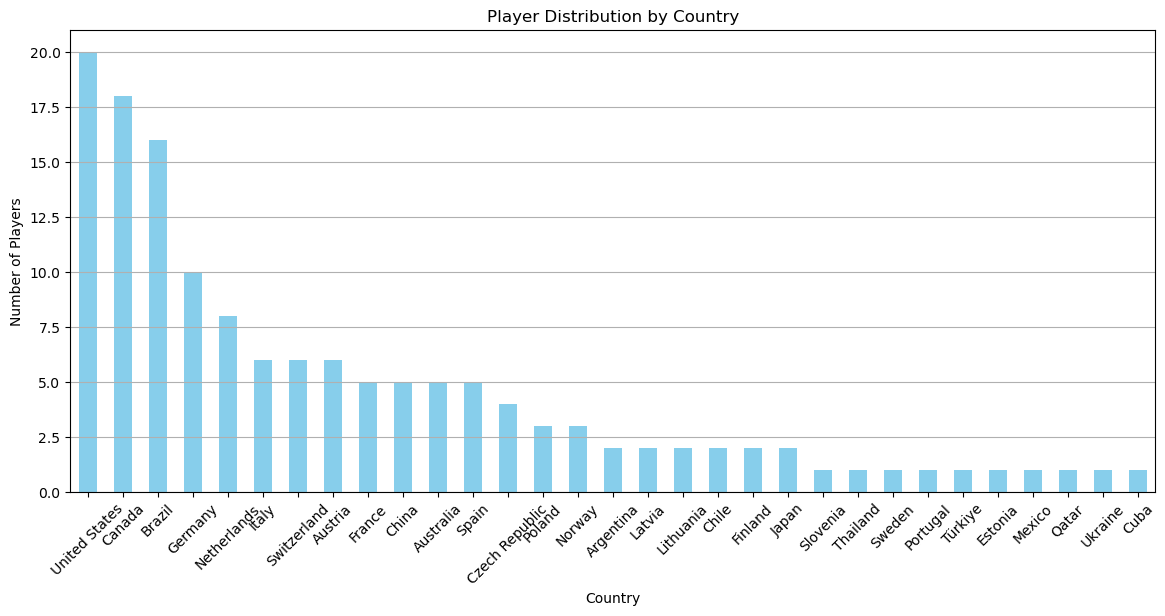

United States     20
Canada            18
Brazil            16
Germany           10
Netherlands        8
Italy              6
Switzerland        6
Austria            6
France             5
China              5
Australia          5
Spain              5
Czech Republic     4
Poland             3
Norway             3
Argentina          2
Latvia             2
Lithuania          2
Chile              2
Finland            2
Japan              2
Slovenia           1
Thailand           1
Sweden             1
Portugal           1
Türkiye            1
Estonia            1
Mexico             1
Qatar              1
Ukraine            1
Cuba               1
Name: COUNTRY, dtype: int64

In [27]:
# Player Distribution by Country
player_country_distribution = transformed_player_info_df['COUNTRY'].value_counts()
player_country_distribution.plot(kind='bar', figsize=(14, 6), color='skyblue')
plt.title('Player Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

player_country_distribution

### Player Distribution by Country

From the bar chart, we can observe that the United States has the highest number of players in our dataset, followed by Canada and Brazil.

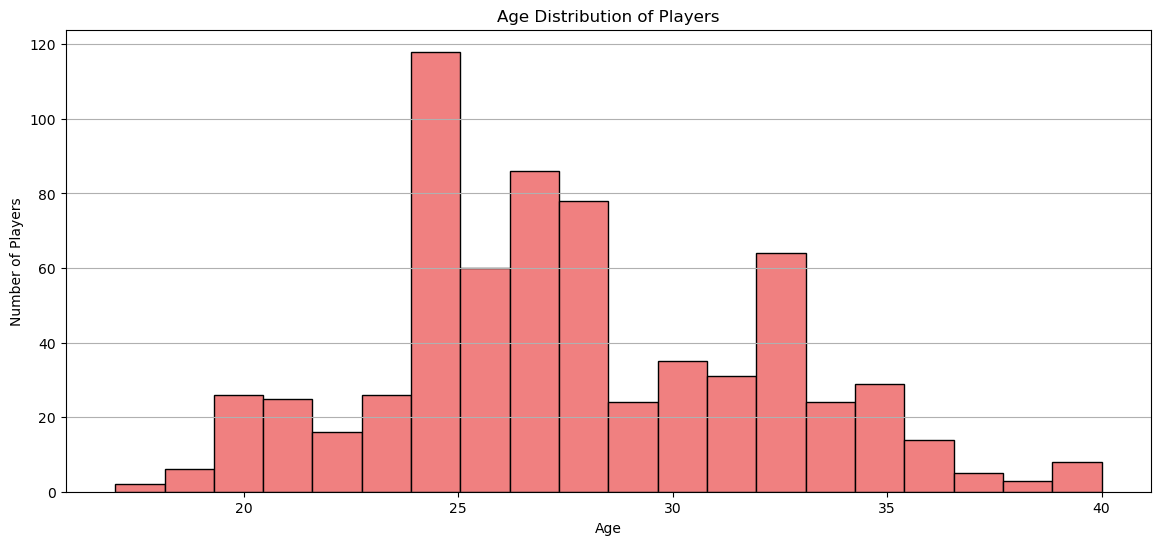

count    680.000000
mean      27.717647
std        4.419429
min       17.000000
25%       25.000000
50%       27.000000
75%       31.000000
max       40.000000
Name: AGE, dtype: float64

In [28]:
# Age Distribution
plt.figure(figsize=(14, 6))
plt.hist(merged_teams_df['AGE'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.grid(axis='y')
plt.show()

# Descriptive statistics for age
age_statistics = transformed_teams_df['AGE'].describe()
age_statistics

### Age Distribution of Players

The histogram showcases the age distribution of players. Most players are in their late 20s, with the average age being approximately 28 years. The youngest player is 17 years old, and the oldest is 40. This distribution indicates that players in their late 20s to early 30s are dominant in these tournaments, suggesting that experience plays a crucial role in performance.

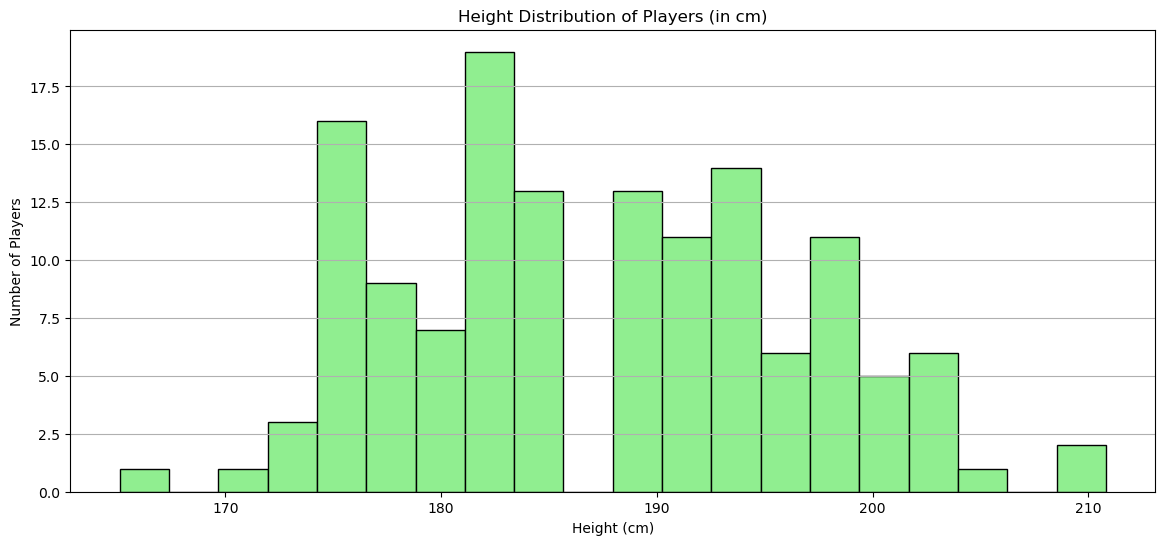

count    138.000000
mean     187.315797
std        9.140402
min      165.100000
25%      180.340000
50%      186.690000
75%      193.040000
max      210.820000
Name: HEIGHT_cm, dtype: float64

In [29]:
# Height Distribution
plt.figure(figsize=(14, 6))
plt.hist(transformed_player_info_df['HEIGHT_cm'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Height Distribution of Players (in cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Players')
plt.grid(axis='y')
plt.show()

# Descriptive statistics for height
height_statistics = transformed_player_info_df['HEIGHT_cm'].describe()
height_statistics

### Height Distribution of Players

The histogram displays the height distribution of players in centimeters. The average height of players is approximately 188 cm. The shortest player has a height of 165.1 cm, while the tallest reaches 210.82 cm. A significant number of players have heights ranging between 180 cm and 195 cm. Height can be a crucial factor in volleyball, especially for positions like spikers and blockers.

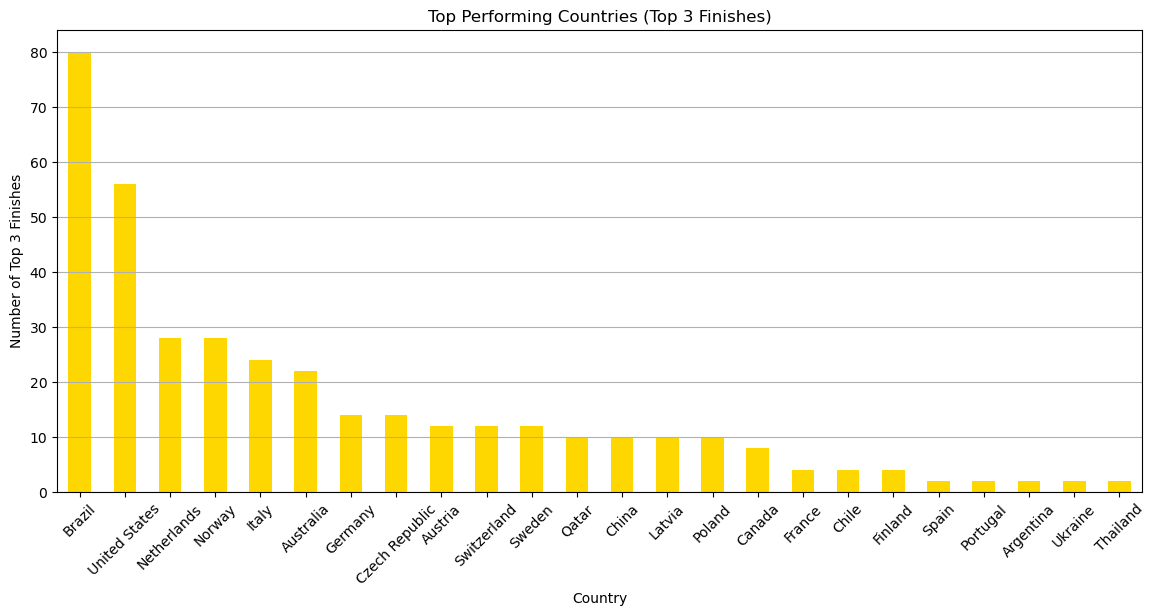

Brazil            80
United States     56
Netherlands       28
Norway            28
Italy             24
Australia         22
Germany           14
Czech Republic    14
Austria           12
Switzerland       12
Sweden            12
Qatar             10
China             10
Latvia            10
Poland            10
Canada             8
France             4
Chile              4
Finland            4
Spain              2
Portugal           2
Argentina          2
Ukraine            2
Thailand           2
Name: COUNTRY, dtype: int64

In [30]:
# Top Performing Countries
top_countries = merged_teams_df[merged_teams_df['FINISH'] <= 3]['COUNTRY'].value_counts()
top_countries.plot(kind='bar', figsize=(14, 6), color='gold')
plt.title('Top Performing Countries (Top 3 Finishes)')
plt.xlabel('Country')
plt.ylabel('Number of Top 3 Finishes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

top_countries

### Top Performing Countries (Top 3 Finishes)

The bar chart showcases the countries with the highest number of top 3 finishes. Brazil leads the chart, followed by the United States, Itay, and th Netherlands.

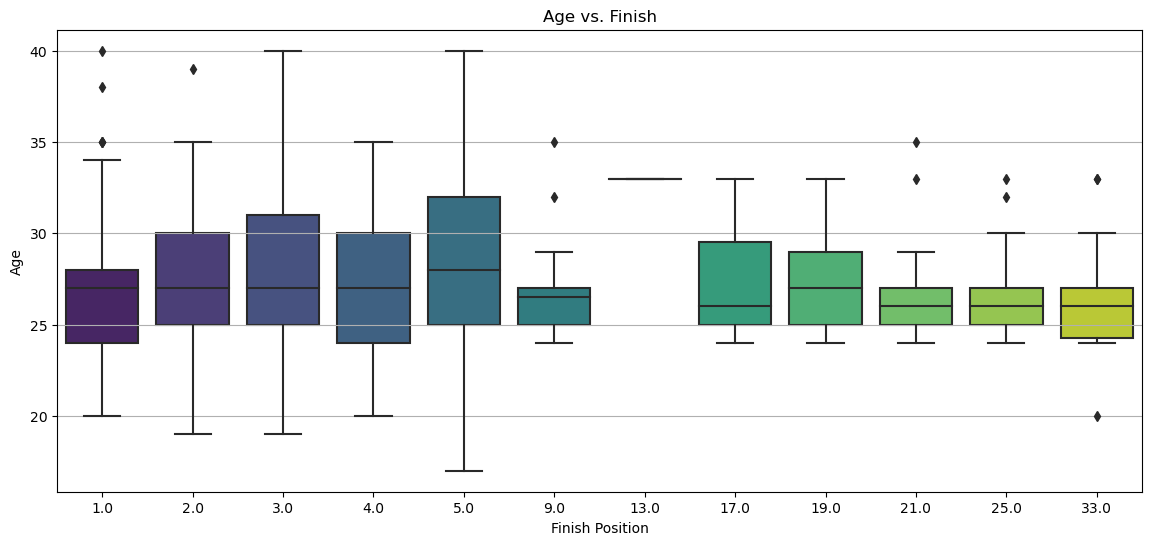

In [31]:
# Age vs. Finish
plt.figure(figsize=(14, 6))
sns.boxplot(x='FINISH', y='AGE', data=merged_teams_df, palette='viridis')
plt.title('Age vs. Finish')
plt.xlabel('Finish Position')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()

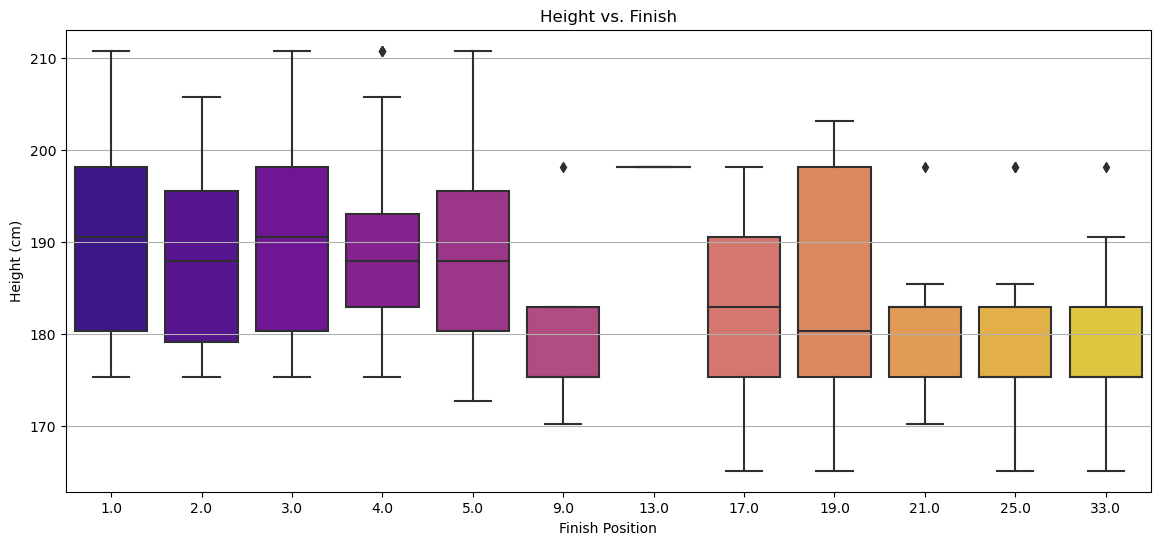

In [32]:
# Height vs. Finish
plt.figure(figsize=(14, 6))
sns.boxplot(x='FINISH', y='HEIGHT_cm', data=merged_teams_df, palette='plasma')
plt.title('Height vs. Finish')
plt.xlabel('Finish Position')
plt.ylabel('Height (cm)')
plt.grid(axis='y')
plt.show()

### Height vs. Finish

The boxplot illustrates the relationship between a player's height and their team's finishing position in the tournaments. Players in teams that finish in the top positions tend to have a slightly higher median height compared to teams that finish lower. This suggests that height can be an advantage in volleyball, especially for positions that require reaching over the net, such as spikers and blockers.

## Team Canada Performance Analysis

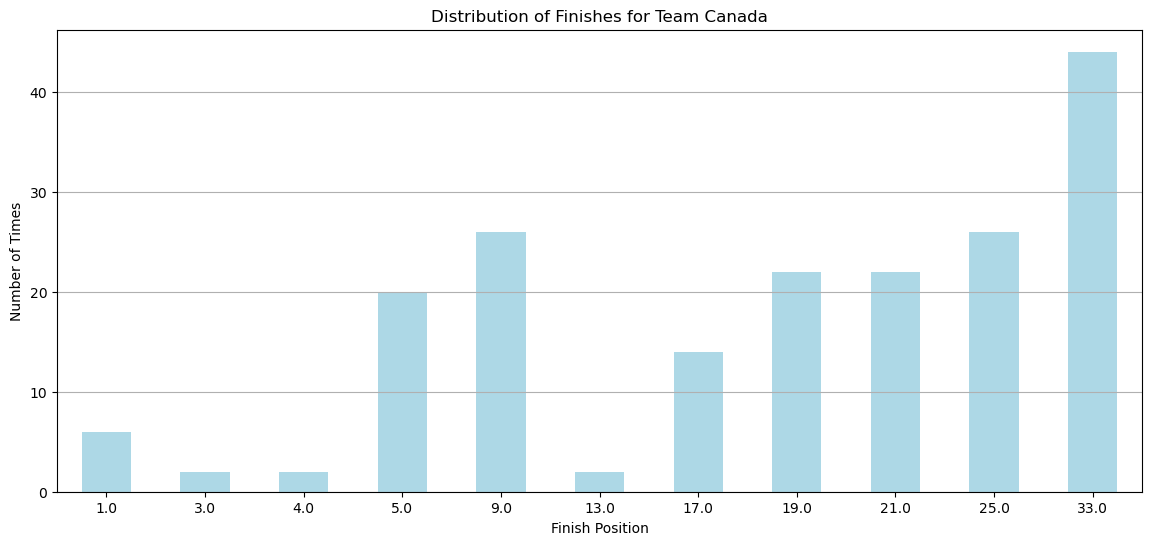

In [33]:
canada_finish_distribution = merged_teams_df[merged_teams_df['COUNTRY'].str.upper() == 'CANADA']['FINISH'].value_counts().sort_index()
# Distribution of Finishes for Team Canada
canada_finish_distribution.plot(kind='bar', figsize=(14, 6), color='lightblue')
plt.title('Distribution of Finishes for Team Canada')
plt.xlabel('Finish Position')
plt.ylabel('Number of Times')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Comparison of Team Canada with Top Teams

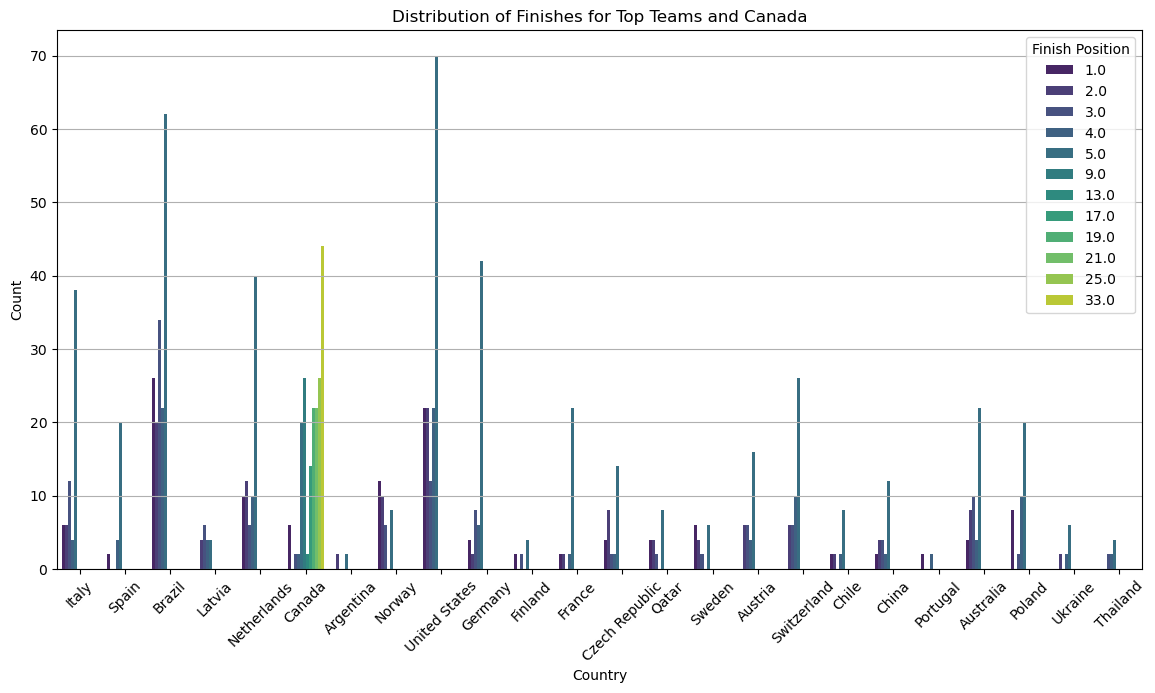

In [34]:
# Extracting top 3 teams based on their finishes
top_teams = merged_teams_df[merged_teams_df['FINISH'] <= 3]['COUNTRY'].value_counts().index.tolist()

# Filtering the dataframe for only top teams and Canada
comparison_df = merged_teams_df[merged_teams_df['COUNTRY'].isin(top_teams + ['CANADA'])]

# Plotting the distribution of finishes for top teams and Canada
plt.figure(figsize=(14, 7))
sns.countplot(data=comparison_df, x='COUNTRY', hue='FINISH', palette='viridis')
plt.title('Distribution of Finishes for Top Teams and Canada')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Finish Position')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Analysis of Player Attributes: Age and Height

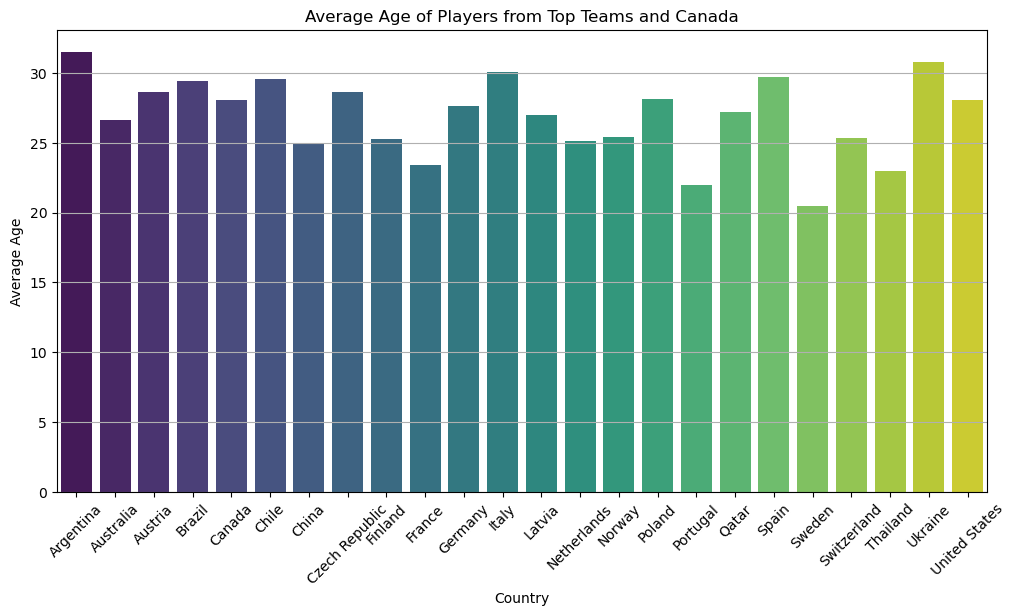

In [35]:
# Average Age of Players from Top Teams and Canada
avg_age_df = comparison_df.groupby('COUNTRY')['AGE'].mean().reset_index()

# Plotting the average age
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_age_df, x='COUNTRY', y='AGE', palette='viridis')
plt.title('Average Age of Players from Top Teams and Canada')
plt.xlabel('Country')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

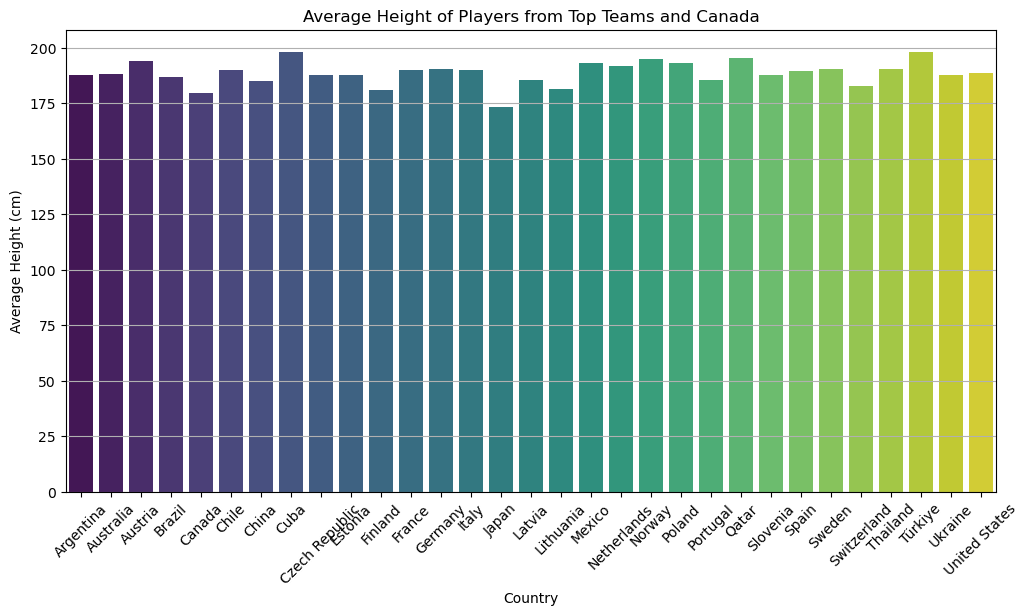

In [36]:
# Average Height of Players from Top Teams and Canada
avg_height_df = merged_teams_df.groupby('COUNTRY')['HEIGHT_cm'].mean().reset_index()

# Plotting the average height
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_height_df, x='COUNTRY', y='HEIGHT_cm', palette='viridis')
plt.title('Average Height of Players from Top Teams and Canada')
plt.xlabel('Country')
plt.ylabel('Average Height (cm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Correlation Analysis: Player Attributes and Team Performance

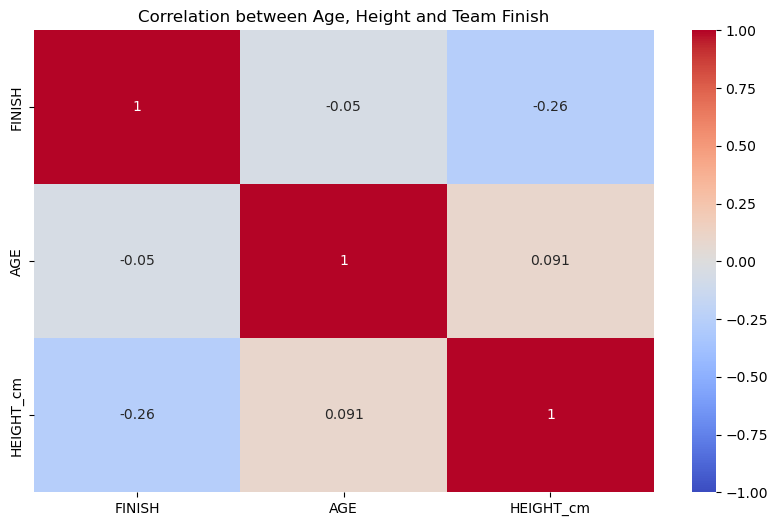

In [37]:
# Correlation between Age, Height and Team Finish
# Converting the 'FINISH' column to numeric for correlation calculation
merged_teams_df['FINISH'] = pd.to_numeric(merged_teams_df['FINISH'], errors='coerce')

# Calculating the correlation
correlation_df = merged_teams_df[['FINISH', 'AGE', 'HEIGHT_cm']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Age, Height and Team Finish')
plt.show()

## Performance Analysis of Top Teams

Analyzing the performance of the top teams can provide insights into what makes them successful. Let's look at factors like average age, height, and experience to see if there are any commonalities among the top-performing teams.

In [38]:
# Identify teams that frequently finish in top 3 positions
top_teams = merged_teams_df[merged_teams_df['FINISH'] <= 3]['TEAM_NAME'].value_counts().head(10)
top_teams

Anders Mol / Christian Sorum              22
Duda Lisboa / Ana Patricia Silva          18
Carol Salgado / Barbara Seixas            16
Mariafe Artacho / Taliqua Clancy          14
Andre Loyola / George Wanderley           12
David Ahman / Jonatan Hellvig             12
Michal Bryl / Bartosz Losiak              10
Andressa Cavalcanti / Vitoria De Souza    10
Cherif Samba / Ahmed Tijan                10
Raisa Schoon / Katja Stam                 10
Name: TEAM_NAME, dtype: int64

### Player Attributes of Top Teams

Now that we have identified the top teams based on their frequent top 3 finishes, let's analyze the average age, height, and other relevant attributes of their players.

In [39]:
# Filter the merged_teams_df for top teams
top_teams_df = merged_teams_df[merged_teams_df['TEAM_NAME'].isin(top_teams.index)]

# Calculate average age and height for players of top teams
avg_attributes_top_teams = top_teams_df.groupby('TEAM_NAME').agg({'AGE': 'mean', 'HEIGHT_cm': 'mean'}).reset_index()

# Display the average attributes of players from top teams
avg_attributes_top_teams

,TEAM_NAME,AGE,HEIGHT_cm
0,Anders Mol / Christian Sorum,25.000000,200.66
1,Andre Loyola / George Wanderley,27.500000,200.66
2,Andressa Cavalcanti / Vitoria De Souza,25.571429,175.26
3,Carol Salgado / Barbara Seixas,34.600000,177.80
4,Cherif Samba / Ahmed Tijan,27.222222,195.58
5,David Ahman / Jonatan Hellvig,20.444444,190.50
6,Duda Lisboa / Ana Patricia Silva,23.750000,180.34
7,Mariafe Artacho / Taliqua Clancy,28.500000,175.26
8,Michal Bryl / Bartosz Losiak,27.300000,198.12
9,Raisa Schoon / Katja Stam,20.272727,175.26


### Visualization of Player Attributes for Top Teams

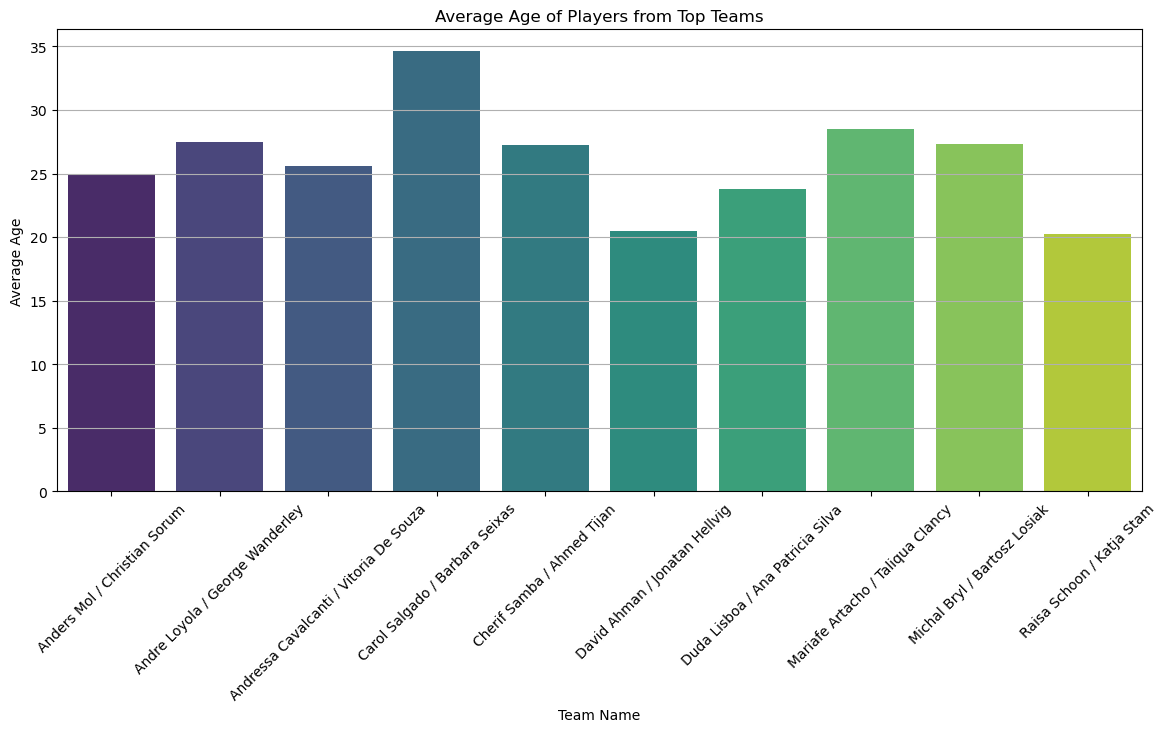

In [40]:
# Visualization of Average Age of Players from Top Teams
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_attributes_top_teams, x='TEAM_NAME', y='AGE', palette='viridis')
plt.title('Average Age of Players from Top Teams')
plt.xlabel('Team Name')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [41]:
avg_attributes_top_teams

,TEAM_NAME,AGE,HEIGHT_cm
0,Anders Mol / Christian Sorum,25.000000,200.66
1,Andre Loyola / George Wanderley,27.500000,200.66
2,Andressa Cavalcanti / Vitoria De Souza,25.571429,175.26
3,Carol Salgado / Barbara Seixas,34.600000,177.80
4,Cherif Samba / Ahmed Tijan,27.222222,195.58
5,David Ahman / Jonatan Hellvig,20.444444,190.50
6,Duda Lisboa / Ana Patricia Silva,23.750000,180.34
7,Mariafe Artacho / Taliqua Clancy,28.500000,175.26
8,Michal Bryl / Bartosz Losiak,27.300000,198.12
9,Raisa Schoon / Katja Stam,20.272727,175.26


## Data Aggregation for Visualization

### Tournament Performance Dataframe

In [42]:
# Aggregating performance metrics by tournament
tournament_performance_df = merged_teams_df.groupby('EVENT').agg({
    'FINISH': 'mean',
    'AGE': 'mean',
    'HEIGHT_cm': 'mean'
}).reset_index()

# Display the aggregated dataframe
tournament_performance_df.head()

,EVENT,FINISH,AGE,HEIGHT_cm
0,CHALLENGE MEN,6.310345,28.545455,195.299509
1,CHALLENGE WOMEN,8.452381,26.668269,179.439113
2,ELITE 16 MEN,4.671875,28.531469,195.758873
3,ELITE 16 WOMEN,5.015038,27.506098,180.618780


### Country Performance Dataframe

In [43]:
# Aggregating performance metrics by country
country_performance_df = merged_teams_df.groupby('COUNTRY').agg({
    'FINISH': 'mean',
    'AGE': 'mean',
    'HEIGHT_cm': 'mean'
}).reset_index()

# Display the aggregated dataframe
country_performance_df.head()

,COUNTRY,FINISH,AGE,HEIGHT_cm
0,Argentina,3.500000,31.500000,187.960000
1,Australia,3.666667,26.625000,188.180870
2,Austria,3.937500,28.666667,194.007619
3,Brazil,3.451220,29.417582,186.815604
4,Canada,19.354839,28.080000,179.814483


Save to File

In [44]:
avg_attributes_top_teams.to_csv("avg_attributes_top_teams.csv")
country_performance_df.to_csv("country_performance_df.csv")
tournament_performance_df.to_csv("tournament_performance_df.csv")

## Exploring with ML

### K-Means Clustering Analysis

In [45]:
merged_teams_df.isna().sum()

FINISH              74
COUNTRY              0
TEAM_NAME            0
BVB_ID               0
FIVB_NAME            0
TOURNISTARTDATE      0
TOURNIENDDATE        0
TOURNLOCATION        0
EVENT                0
TOURNID              0
AGE                542
PLAYER_ID          542
HEIGHT_cm          550
dtype: int64

In [46]:
model_merged_teams_df = merged_teams_df.dropna()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

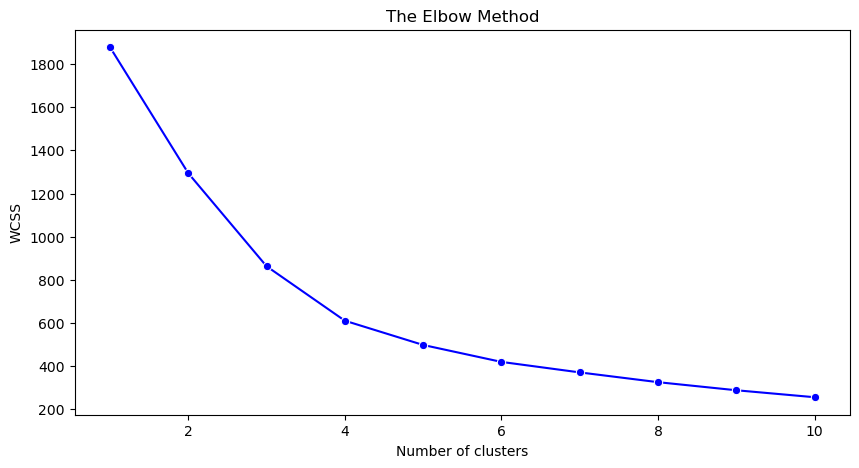

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Selecting relevant features for clustering
features = ['FINISH', 'AGE', 'HEIGHT_cm']
clustering_data = model_merged_teams_df[features]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_21/578929957.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_merged_teams_df['Cluster'] = clustered_data


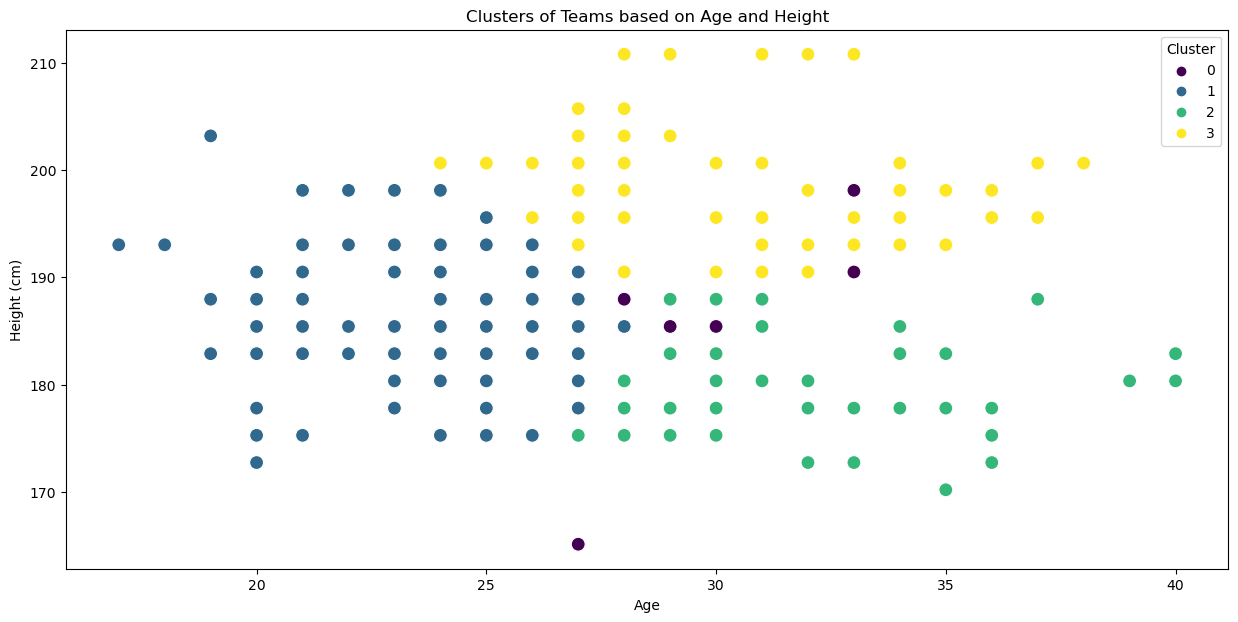

In [48]:
# Based on the Elbow method
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_data = kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the original data
model_merged_teams_df['Cluster'] = clustered_data

# Visualizing the clusters using a scatter plot
plt.figure(figsize=(15,7))
sns.scatterplot(x=model_merged_teams_df['AGE'], y=model_merged_teams_df['HEIGHT_cm'], hue=model_merged_teams_df['Cluster'], palette='viridis', s=100)
plt.title('Clusters of Teams based on Age and Height')
plt.xlabel('Age')
plt.ylabel('Height (cm)')
plt.show()

Using just - `FINISH` and `AGE`

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

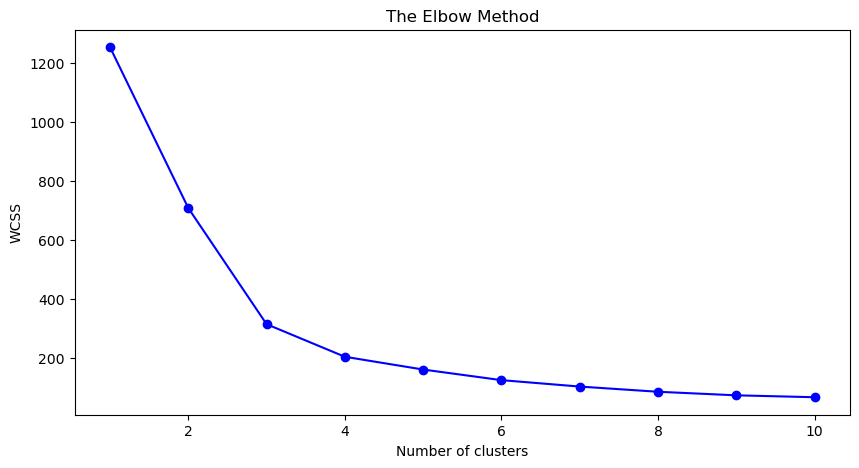

In [49]:

# Preparing the data for clustering
clustering_data = model_merged_teams_df[['FINISH', 'AGE']]
clustering_data = clustering_data.dropna()

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


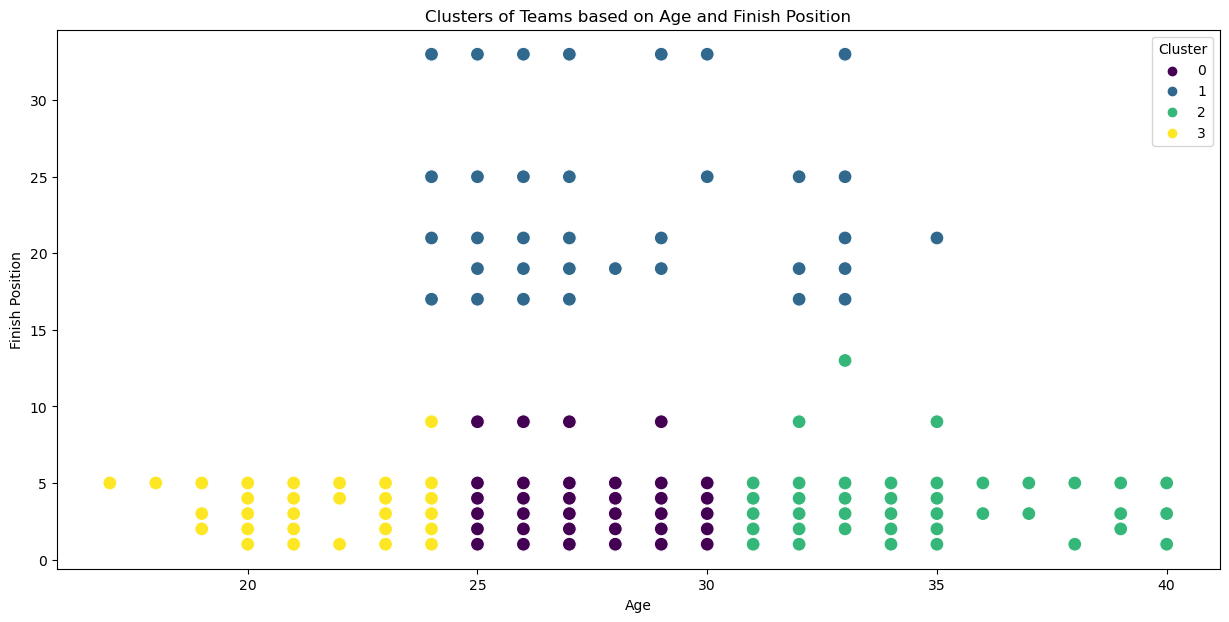

In [50]:
# Applying KMeans clustering with the optimal number of clusters (e.g., 3)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_data = kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the original data
clustering_data['Cluster'] = clustered_data

# Visualizing the clusters using a scatter plot
plt.figure(figsize=(15,7))
sns.scatterplot(x=clustering_data['AGE'], y=clustering_data['FINISH'], hue=clustering_data['Cluster'], palette='viridis', s=100)
plt.title('Clusters of Teams based on Age and Finish Position')
plt.xlabel('Age')
plt.ylabel('Finish Position')
plt.show()

### PCA

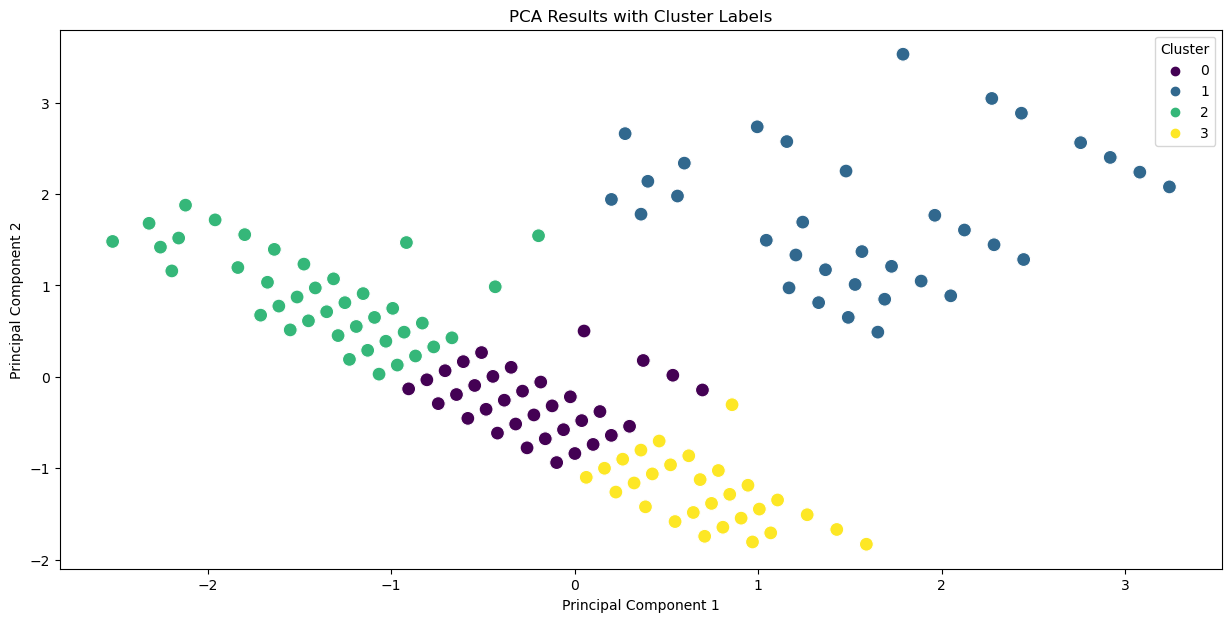

In [51]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_data['Cluster'] = clustered_data

# Visualizing the PCA results
plt.figure(figsize=(15,7))
sns.scatterplot(x=pca_data['Principal Component 1'], y=pca_data['Principal Component 2'], hue=pca_data['Cluster'], palette='viridis', s=100)
plt.title('PCA Results with Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()